# Neural Network practical 

## Adam Hamilton

## 6/10/2021

So the purpose of this practical is to get a hands on feel of using a neural network at a fairly low level. Here the weights of the neural net and the activation functions are all hard coded

In [2]:
# python translation of the Neural network from Deep Learning: An Introduction for Applied Mathematicians
# by Catherine F. Higham and Desmond J. Higham

# import various packages that we use in this practical 
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import copy 

# DATA %%%%%%%%%%%
# the inputs of the training data
x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]

# the outputs of the training data
y = np.array([[1,1,1,1,1,0,0,1,0,0],[0, 0, 0, 0, 0, 1, 1, 0, 1, 1]])

# sets the seed of the PRNG
np.random.seed(5000)

# initialises the weights and the biases using a uniformly distributed PRNG
W2 = -0.5*np.random.rand(2,2); W3 = 0.5*np.random.rand(5,2); W4 = 0.5*np.random.rand(2,5);
# initialises the biases using a PRNG
b2 = 0.5*np.random.rand(2,1); b3 = 0.5*np.random.rand(5,1); b4 = 0.5*np.random.rand(2,1);

# combines the weights and biases into a list to make things a bit simpler for us
W = [W2, W3, W4]
b = [b2, b3, b4]

def netbp(x, y, eta, W, b):
    """
    Does forward propagation through the network with the sigmoid activation function. 
    and then backpropagates to train the network. 
    
    x is the input to the matrix expressed as a matrix in numpy. Note: even if your input is a single number you 
    would need input this as np.array([[x]])
    
    y is the output of the training data (a numpy matrix)
    """
    # unpacks the lists of weights and biases
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    
    # pass the input through the hidden layers
    # the z terms are the affine transformations of the data and the a terms are the affine transformations 
    # after being fed through the activation function
    a2, z2 = Activate(x, W2, b2)
    a3, z3 = Activate(a2, W3, b3)
    a4, z4 = Activate(a3, W4, b4)
    # back pass
    delta4 = a4*(1-a4)*(a4-y)
    delta3 = a3*(1-a3)*(W4.transpose()@delta4)
    delta2 = a2*(1-a2)*(W3.transpose()@delta3)
    # gradient step
    W2 = W2 - eta*delta2@x.transpose()
    W3 = W3 - eta*delta3@a2.transpose()
    W4 = W4 - eta*delta4@a3.transpose()
    b2 = b2 - eta*delta2;
    b3 = b3 - eta*delta3;
    b4 = b4 - eta*delta4;
    
    W = [W2, W3, W4]
    b = [b2, b3, b4]
    return W, b

def Activate(x, W, b):
    # the activation function. In this case it is a sigmoid 
    z = W@x+b
    return 1/(1+np.exp(-1*z)), z

def cost(x1, x2, ytrain, W, b):
    # calculates the cost function. In this case the sum of squares between the calcualted outputs and the training 
    # dataset outputs 
    # unpacks W and b
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    # does a forward pass on each of the traning data inputs
    error_total = 0
    for i in range(len(x1)):
        x = np.array([[x1[i]],[x2[i]]])
        y2 = np.array([[ytrain[0][i]],[ytrain[1][i]]])
        
        a2, z2 = Activate(x, W2, b2)
        a3, z3 = Activate(a2, W3, b3)
        a4, z4 = Activate(a3, W4, b4)
        
        err2 = sum((a4- y2)**2)
        error_total += err2
    return err2

def f(x1, x2, W, b):
    # calculates the output of the neural network given an input
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    error_total = 0
    x = np.array([[x1],[x2]])
        
    a2, z2 = Activate(x, W2, b2)
    a3, z3 = Activate(a2, W3, b3)
    a4, z4 = Activate(a3, W4, b4)
    return a4

In [7]:
# trains the neural network for N iterations 

#number of iterations
N = 1000000

c = [] # preallocates a list to store the cost functions 

for i in tqdm(range(N)):
    k = np.random.randint(len(x1))
    x = np.array([[x1[k]],[x2[k]]])
    y2 = np.array([[y[0][k]],[y[1][k]]])
    W, b = netbp(x,y2, 0.01, W, b)
    c.append(cost(x1, x2, y, W, b))



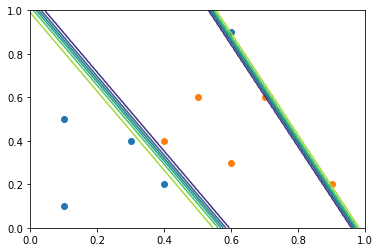

In [8]:
# plots the contours of the first arguement of the neural network on top of the scatter plot of the original
# training data to see how well the neural net is working 
xgrid = np.linspace(0, 1, 100)
ygrid = np.linspace(0, 1, 100)

X, Y = np.meshgrid(xgrid, ygrid)
Z = copy.copy(X)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i][j] = f(X[i][j], Y[i][j], W, b)[0][0]

        
plt.contour(X, Y, Z)#, colors='black');
plt.scatter(x1[0:5],x2[0:5])
plt.scatter(x1[5:10],x2[5:10])

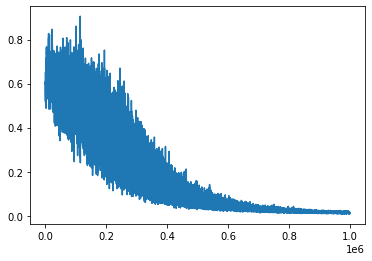

In [9]:
# plots the value of the cost function over time 
plt.plot(c)

In [19]:
# going to try and approximate the sine function

x1 = 24*np.random.rand(300)
y = np.sin(x1)

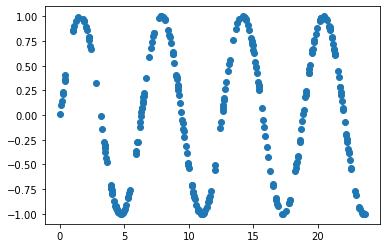

In [20]:
plt.scatter(x1,y)

In [61]:
np.random.seed(71)
W2 = -0.5*np.random.rand(12,1); W3 = 0.5*np.random.rand(15,12); W4 = 0.5*np.random.rand(1,15);
b2 = 0.5*np.random.rand(12,1); b3 = 0.5*np.random.rand(15,1); b4 = 0.5*np.random.rand(1,1);

W = [W2, W3, W4]
b = [b2, b3, b4]

def netbp(x, y, eta, W, b):
    """
    Does forward propagation through the network with the sigmoid activation function. 
    and then backpropagates to train the network
    """
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    
    a2, z2 = Activate(x, W2, b2)
    a3, z3 = Activate(a2, W3, b3)
    a4, z4 = Activate(a3, W4, b4)
    
    # back pass
    delta4 = a4*(1-a4)*(a4-y)
    delta3 = a3*(1-a3)*(W4.transpose()@delta4)
    delta2 = a2*(1-a2)*(W3.transpose()@delta3)
    # gradient step
    W2 = W2 - eta*delta2@x.transpose()
    W3 = W3 - eta*delta3@a2.transpose()
    W4 = W4 - eta*delta4@a3.transpose()
    b2 = b2 - eta*delta2;
    b3 = b3 - eta*delta3;
    b4 = b4 - eta*delta4;
    
    W = [W2, W3, W4]
    b = [b2, b3, b4]
    return W, b

def Activate(x, W, b):
    z = W@x+b
    return 1/(1+np.exp(-1*z)), z



def cost(x1, ytrain, W, b):
    # unpacks W and b
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    # does a forward pass 
    error_total = 0
    for i in range(len(x1)):
        x = np.array([[x1[i]]])
        y2 = np.array([ytrain[i]])
        
        a2, z2 = Activate(x, W2, b2)
        a3, z3 = Activate(a2, W3, b3)
        a4, z4 = Activate(a3, W4, b4)

        err2 = sum((a4- y2)**2)
        error_total += err2
    return err2

def f(x1, W, b):
    W2 = W[0]
    W3 = W[1]
    W4 = W[2]
    
    b2 = b[0]
    b3 = b[1]
    b4 = b[2]
    error_total = 0
    x = np.array([[x1]])
        
    a2, z2 = Activate(x, W2, b2)
    a3, z3 = Activate(a2, W3, b3)
    a4, z4 = Activate(a3, W4, b4)
    return a4

In [63]:
N = 10000000
xgrid = np.linspace(0, 24, 100)

for i in tqdm(range(N)):
    k = np.random.randint(len(x1))
    x = np.array([[x1[k]]])
    y2 = np.array([y[k]])
    W, b = netbp(x,y2, 0.001, W, b)
    if i%1000 == 0:
        print(cost(x1, y, W, b)[0])
        print(f(1.5, W, b)[0][0])
        print(' ')

        

0.3167137589472048
0.3925024598391918
 
0.4637363232031372
0.24164972762219233
 
0.5471146904608593
0.1750631970402033
 
0.597630793432557
0.14061171093429323
 
0.6326518722340546
0.11914063811578765
 
0.6664956877052628
0.10014736535494256
 
0.6885678960394175
0.08868445796606644
 
0.704882412144614
0.08060733431914247
 
0.724569202173771
0.07148121251860876
 
0.7382690778860396
0.06538781692710159
 
0.7470621967840027
0.061542878454457946
 
0.7524469748973862
0.05920727603883138
 
0.7600107525022947
0.05617493263977049
 
0.768401628746015
0.052802536138260484
 
0.7746763967436161
0.050343556344369995
 
0.7798702528979369
0.0483572695530938
 
0.7875989394606706
0.04548535649642439
 
0.7950743148444767
0.04280939901277946
 
0.7981057119995941
0.04173522772957245
 
0.8027427296369768
0.04004932731959135
 
0.8054425678459616
0.03908190832673144
 
0.808635706786344
0.03796030257819063
 
0.8113981635064147
0.0370053482600431
 
0.815382669902569
0.03570793341148329
 
0.817926854171856
0.034

0.8894233676020441
0.011566363093788338
 
0.8897865249969145
0.011480969126430146
 
0.889751559922407
0.011476183002138533
 
0.8889713939465459
0.011609959860341168
 
0.8895121821792432
0.011498177628348332
 
0.8896422445338765
0.011457001416848361
 
0.8897396744629479
0.011418680872297117
 
0.8902319260014542
0.011316408916392956
 
0.8905218779828009
0.011251841605756934
 
0.8904147444743994
0.011261515796180923
 
0.8907010152272656
0.01119141469454677
 
0.8908288226712398
0.011156536371929511
 
0.890532063496396
0.011209554837590077
 
0.8903903126055703
0.011223608741183071
 
0.8905175636475101
0.011194018818362255
 
0.889997972672839
0.011288776840805434
 
0.8900854958697834
0.01126094550557743
 
0.8897308521488008
0.011322412724699193
 
0.889867119230566
0.011287978613379433
 
0.8899982648666296
0.011248801637944266
 
0.8901906960321527
0.011197038276693692
 
0.8901496683151927
0.011191728661783591
 
0.8903186096986706
0.011144634648324837
 
0.8908651352147597
0.011023324791345528


0.8926206016009854
0.009551925045280442
 
0.8927545803037643
0.009520792006313365
 
0.8928179968254752
0.009506791051411572
 
0.8931460717383402
0.009439512139734816
 
0.8930262119696368
0.00945920655379506
 
0.8929280506934058
0.009476050239226805
 
0.8927894352765532
0.009499393094801332
 
0.8928257550876185
0.009487990445113538
 
0.8926809669590711
0.009513899780641016
 
0.8926118290499114
0.009524307433513799
 
0.8928409783904915
0.00947266117701653
 
0.8927655297035354
0.009486228065808079
 
0.8928875063233167
0.009457939090573958
 
0.8925998757575416
0.009513595021807203
 
0.8924912891158907
0.009529362776850446
 
0.8926919211487955
0.009484699317260998
 
0.8923116539281163
0.009558396522161153
 
0.8925314198262257
0.009508303297114176
 
0.892536100071349
0.009502711653253601
 
0.8931088920106239
0.009385521225641786
 
0.8933375168124243
0.009335806854861125
 
0.8934844588495822
0.009304697199812853
 
0.8932709889954706
0.009342486121057463
 
0.8931727944993734
0.0093576923677449

0.896604911519844
0.008260279724790433
 
0.8966190241579903
0.008255208518096292
 
0.8965971220297633
0.008258444027446493
 
0.8962342482269021
0.008323894147054277
 
0.8963843638181158
0.00829291126305661
 
0.8965689899779499
0.008257129838706903
 
0.8965461776182834
0.008260447508522633
 
0.8963199319755637
0.008301925075768603
 
0.8960307168945431
0.008354473031922636
 
0.8960702735329737
0.008345527045975779
 
0.895826677148117
0.008389094093274244
 
0.895797216042809
0.008394157525171825
 
0.8958891190264774
0.008375037614544374
 
0.8956873214169914
0.008410405650832573
 
0.8958719118128935
0.008374439814876854
 
0.8958353557247394
0.0083808891733469
 
0.8958543592519893
0.008374814038870845
 
0.8960225106457007
0.008341592200267362
 
0.8956866528637557
0.008403298714176385
 
0.8957056032169713
0.008399482429708123
 
0.895824454944853
0.008376185739002976
 
0.8956682886237552
0.008403738538765918
 
0.8958969499821288
0.008359394764938858
 
0.8960633447182826
0.008328125021387942
 

0.8966539064561257
0.007970212268261367
 
0.8965837740759025
0.007981453349048843
 
0.8965297413581135
0.007991311773719962
 
0.8966341248446202
0.007971726883634954
 
0.8963718002697525
0.008019369952772677
 
0.8967610248707265
0.007944545364772633
 
0.8965733599652842
0.007978385142550318
 
0.8967379653387959
0.007946440294100701
 
0.8968048739808274
0.007933469899502816
 
0.8970351443148137
0.007889625587438808
 
0.8969844946294007
0.007896741964035283
 
0.8971446389134424
0.007865290218150855
 
0.8972348611606837
0.007848441288911287
 
0.8970272699933347
0.007886262816696498
 
0.89734234146389
0.00782572968945477
 
0.8972207679636521
0.007845423003862345
 
0.8974583542853365
0.007801301561997108
 
0.8973183788589857
0.007824650815123816
 
0.8975071004300794
0.007788071235206678
 
0.897526876056593
0.007783117461261182
 
0.8976235236818636
0.007764572311531796
 
0.89743611993763
0.007797976483723984
 
0.897345270773036
0.007812979790315464
 
0.89748524824878
0.00778539114227884
 
0.

0.8947876142273296
0.008104952968652887
 
0.8944476646712077
0.008166511044062812
 
0.8949402469039703
0.008074925085312148
 
0.8950399641920325
0.008054782634013562
 
0.8947630083353804
0.008105289625545742
 
0.8946737900055045
0.008121149969699508
 
0.894253983009642
0.008199042837720875
 
0.8940921188053551
0.008229860261905409
 
0.8939514161595961
0.008256471292892932
 
0.8941580234704981
0.008218531688783663
 
0.8938604386229395
0.008273201396535612
 
0.8937676884289423
0.008289878482062396
 
0.8940903074855925
0.008227479066132326
 
0.8936702642141487
0.008305442711438281
 
0.8939779947498261
0.00824789678177798
 
0.8938009130314137
0.0082795168374119
 
0.8938825631765027
0.008262061208097618
 
0.8937790992681078
0.008281526675379788
 
0.8934753152655447
0.008337447542695301
 
0.8931529555453965
0.008396091858626054
 
0.8934079260096454
0.008348003657994327
 
0.8937228519272904
0.008288426663542006
 
0.8935143146879057
0.008325845580166675
 
0.89376108267161
0.008277818078467987


0.8920736381132194
0.008456597736480699
 
0.8918271277067574
0.008501485145959643
 
0.8917767156804728
0.008510130512336005
 
0.8916360707792468
0.008535455440659824
 
0.8916653416098871
0.008529551790530698
 
0.8915119589216072
0.008556717735037047
 
0.8913548991415705
0.008585558388761155
 
0.8913165179447098
0.00859291748561877
 
0.8911960835719502
0.008614764412062279
 
0.8915966008242003
0.008538653402932304
 
0.891610284201079
0.008536137195993767
 
0.8917224365455554
0.008514191509376058
 
0.892021144244206
0.008456598197333067
 
0.891969925088426
0.008465704175646035
 
0.8920738704765361
0.008447329788225114
 
0.8918612159382855
0.008486323490602465
 
0.8921631748898385
0.008427196065730759
 
0.8922977787242047
0.008400852988256862
 
0.8922720463049248
0.008404861571424192
 
0.8924329559699521
0.008374763463814335
 
0.8924241819273312
0.008376164232327784
 
0.892216363668812
0.008413738355937412
 
0.8920246506152512
0.008448155184401398
 
0.8918392961516431
0.008480899958772072

0.8859742950235824
0.009483699176778567
 
0.8857803290579221
0.009519866020756728
 
0.8858239707226725
0.009511028767478653
 
0.8856467130413256
0.00954448329975315
 
0.8859625440499584
0.009483156048870652
 
0.8855428704763445
0.009562132662976243
 
0.8857181473443853
0.009527541974752505
 
0.8857590626459698
0.009517693938924869
 
0.8859108580812676
0.00948556655916486
 
0.8857943852980042
0.00950897262750834
 
0.8853462990152416
0.009594889935416085
 
0.8852287667125642
0.009616221184387626
 
0.8849508801807399
0.009668870257294309
 
0.8850854006493551
0.009642643798080837
 
0.8851166157790132
0.009636355983559894
 
0.8850434382017909
0.009651306894388565
 
0.8849510142359949
0.009669935690355909
 
0.88453643801199
0.00975018183486229
 
0.8847171376776416
0.009713115901466422
 
0.8845126524596647
0.009752299731878652
 
0.884296066096369
0.00979430962651613
 
0.8843208440504525
0.00979096233896497
 
0.8843173762388565
0.009790961494965432
 
0.8844159802799456
0.009771208628015867
 
0

0.8877034715448018
0.009055997120565257
 
0.887773938585944
0.009043027909938951
 
0.8879353070404982
0.009011259471305415
 
0.8878739840467869
0.00902080072474239
 
0.8880955118339482
0.008979604650172661
 
0.8880337990425156
0.008990961278679757
 
0.8880210678757415
0.008993249174107031
 
0.8882500546559453
0.008950685659443023
 
0.888461948622106
0.008912229741163236
 
0.8882689756908846
0.008948242237324537
 
0.8882000625298128
0.008958490233931554
 
0.887856363874822
0.009021234726588676
 
0.8875257008261993
0.009079880392860517
 
0.8873817123476792
0.009106726594106192
 
0.8874917662561158
0.009086490422445402
 
0.887409338975911
0.009099818580428314
 
0.8870988785331319
0.009155211695006736
 
0.8878357643835716
0.009017966206134447
 
0.887652226196574
0.009051328674868258
 
0.8877533785455114
0.009033738528806257
 
0.8875571707920243
0.0090718453524801
 
0.8872390167176125
0.009131134438442531
 
0.8872827431243443
0.009123180934465
 
0.887409725463274
0.009100069178933082
 
0.88

0.8822901383922622
0.009917070268039752
 
0.8822393421986037
0.009927897050294785
 
0.8818391560962825
0.010001204437311013
 
0.8819703490128173
0.009976063102219414
 
0.8816276565144705
0.01004074670225708
 
0.881235550741046
0.010112338171829265
 
0.8811042349566699
0.01013779142945626
 
0.8815175261262548
0.010057600861246851
 
0.8817195600544991
0.010019229074325621
 
0.8818528407765945
0.00999109899518098
 
0.8823120506055924
0.009905364376513133
 
0.8827729736726299
0.00981733281866603
 
0.8833659187978471
0.009708952280134058
 
0.8834483695906382
0.00969306528165961
 
0.8837728088830725
0.00963118534054026
 
0.8835514286313646
0.009669833509772496
 
0.8829950964765789
0.009773056381020865
 
0.882817535212643
0.00980425500344427
 
0.8827858823972374
0.009809398016690587
 
0.8828261637994228
0.009800748033779843
 
0.8827007508386577
0.00982153883331103
 
0.8826953656068413
0.009822288921607619
 
0.8832388839508656
0.009720476524433967
 
0.8833388811046096
0.009700851198949248
 
0.

0.8844817079895904
0.009364000168377679
 
0.884081538451167
0.009433649772447265
 
0.8839753260315131
0.009453062288414823
 
0.8840556463972785
0.009438840219047777
 
0.88392652121637
0.009462498512459621
 
0.8839065899101454
0.0094659178345314
 
0.8840999114724281
0.009430837240139633
 
0.8842066120693305
0.009412673053945565
 
0.8839003512101778
0.009465443819189163
 
0.8839718181492054
0.009452200535222034
 
0.8838695802260417
0.009467199375628224
 
0.8832514372027513
0.009577689432341555
 
0.883106219852841
0.00960507153735034
 
0.8832236741492463
0.009583682358521065
 
0.8829159630123289
0.009639416755561838
 
0.8830237252534835
0.009621239280916911
 
0.883253335273616
0.009576937868471474
 
0.8836731603515073
0.009499964502490538
 
0.8838850879434754
0.009463235051137166
 
0.883634766967136
0.009508582159826808
 
0.8835461731983035
0.009525348995000722
 
0.8836764992637688
0.009499125530497535
 
0.8841235278071637
0.009419781072495114
 
0.8835984309688024
0.00951325046623364
 
0.

0.8845512623622247
0.009192458662766793
 
0.8844323120863461
0.009213399204046228
 
0.8845627580519064
0.009186283147164749
 
0.8847405759263675
0.009156931007079344
 
0.8841885434671487
0.009250757245062724
 
0.884275749212396
0.009231997004690354
 
0.8841739295053822
0.009249771400073594
 
0.8839700859392343
0.00928680523545512
 
0.8840187504902088
0.009276308647485047
 
0.883952977783121
0.009285986138373505
 
0.8836043154726609
0.009345031070951401
 
0.8835281562442823
0.009358254713401898
 
0.8835248044315367
0.00935803287402847
 
0.8834951853965912
0.009365223123597256
 
0.8832935487066963
0.009399840279640864
 
0.8837005980195924
0.009326395378964672
 
0.883630090104612
0.009336589347764978
 
0.8835298555267052
0.009356254927148443
 
0.8832781498256228
0.009401693482806535
 
0.8833385019452447
0.009391667217777268
 
0.8832531713517262
0.009403820663764311
 
0.8833035953811049
0.009396362197552714
 
0.8832347695380147
0.009408395887675976
 
0.8834430419467592
0.009369112178227603

0.8824308715139804
0.009345017256140339
 
0.8821724776831037
0.00938781215011011
 
0.8819357225512404
0.009429092387050609
 
0.8824074795016557
0.009346071138286356
 
0.8818453045754462
0.00944498188390466
 
0.8815464358657457
0.009493695012325366
 
0.8815518730005758
0.009492214239444617
 
0.8811139970624946
0.009568092298685995
 
0.8809655617626838
0.009594925831681214
 
0.8803093580594848
0.00970864597611985
 
0.880720484479422
0.0096343321399819
 
0.8808675004330462
0.009609584359385415
 
0.8809816692145404
0.009588737382304023
 
0.8805956587388726
0.009657439260329291
 
0.8808100589296505
0.009619397231912939
 
0.8811980238355256
0.009550016303077476
 
0.8816122179844271
0.009481356204545582
 
0.8818640496262642
0.00943666472451739
 
0.8815293302925507
0.00949415919628772
 
0.8813806204326472
0.009522886773903238
 
0.8811150856240587
0.00956794355448854
 
0.8810415277065272
0.009581846248258712
 
0.8807456040208251
0.009632319091651539
 
0.8807707530983052
0.009625766409480594
 
0

0.8811465097586403
0.009360592385244428
 
0.8808449940864017
0.009408494274582386
 
0.8809587978086361
0.009389362361701193
 
0.8808758557197877
0.009401451240653579
 
0.880762239228456
0.009418789038659177
 
0.8806306191748047
0.009442423377453862
 
0.8811690573928632
0.009350819420802707
 
0.8812454734154612
0.009336501251469332
 
0.8815650200313664
0.00927904688226951
 
0.8811799083848849
0.009345842083572706
 
0.8818009129993445
0.009238388640432627
 
0.8819457374214601
0.009212350250961837
 
0.8816990092405881
0.009253675025967092
 
0.8818484801748498
0.00922698363806766
 
0.8820278041197456
0.009192616540487142
 
0.8817118249941605
0.009244742775149948
 
0.8816818819382571
0.009247973387468137
 
0.8811957188471646
0.00932911002999412
 
0.8811570813801683
0.00933261051291273
 
0.8809501069600905
0.009368124820410799
 
0.8804936574438008
0.009444210622597477
 
0.8803526808594122
0.009469483919384715
 
0.8800745088472235
0.00951727755433958
 
0.8800913628543057
0.009512214245973465


0.8785289442748473
0.009618799363452595
 
0.8791281827116219
0.009514413017543489
 
0.8792071230272859
0.009500741036870415
 
0.8792776400409533
0.009488189012963102
 
0.8790244238183917
0.009528996586275535
 
0.8789359911218677
0.009539627554452581
 
0.879265562208156
0.009484489937328653
 
0.8796156256930125
0.009427800661857154
 
0.8793664999195918
0.009467838553152532
 
0.8796270950137761
0.009421313450439358
 
0.8801182046250055
0.009335499363267923
 
0.8802690636616126
0.009305491647435252
 
0.8802071031453349
0.00931274232885219
 
0.8803821751727005
0.009281817492936452
 
0.8805754663215015
0.00924777843125086
 
0.880014170216822
0.009340843709314928
 
0.8804639471369923
0.009261236837043885
 
0.8798372970582172
0.009365320937103863
 
0.8797943561286026
0.009371427089605401
 
0.8799486545228778
0.009345697297768157
 
0.8797847406172836
0.009370528824255982
 
0.880179493045068
0.009301144982645691
 
0.880030339281081
0.009325470962383913
 
0.8799615031417122
0.009337392759469381


0.8819044890540005
0.008841195003460436
 
0.881658737087149
0.008878999706678534
 
0.8815480293524468
0.008895498795328236
 
0.8819931595196399
0.008823056616836805
 
0.8818603699806223
0.008841906452244459
 
0.881712188990604
0.008863347332233188
 
0.8812938463205531
0.00892720716802296
 
0.881173071392169
0.00894511114111509
 
0.8811884032571512
0.008939950033648301
 
0.8812532635028796
0.008925063879508746
 
0.8811349585344769
0.008943941195103961
 
0.8810481649356406
0.008955936230710927
 
0.8810713189421354
0.00895343713421932
 
0.8810205352389608
0.008961444916968311
 
0.8810450823302092
0.00895444813267788
 
0.8811290252248438
0.008940728049552656
 
0.8813049160407139
0.008911299633619037
 
0.8817566911694665
0.008837055321559322
 
0.8817295835458138
0.008839014080502415
 
0.8814776803415938
0.008878994585022747
 
0.881469422444045
0.008877148318697741
 
0.8816503566548343
0.008846731313349674
 
0.8811245461867436
0.00893211510749986
 
0.880792295387388
0.008986274826129341
 
0.

0.8742704375607501
0.009861746692092494
 
0.8742045944738637
0.009870892329398029
 
0.8745236755649322
0.009818531798671142
 
0.8742699804866119
0.009858054768619047
 
0.8745002080376558
0.009816215254586143
 
0.8744182667490058
0.00982778612149576
 
0.8741629413945688
0.009871815221517853
 
0.8744042159502567
0.009830324524565906
 
0.8751851596250549
0.009699438873084977
 
0.8754465344740575
0.009652479948627085
 
0.8750113607850941
0.009724640858743885
 
0.8747971448384815
0.009762688733665226
 
0.8744627438258532
0.009818926243680144
 
0.8748121970603218
0.009759749488993495
 
0.8749949746147471
0.00972758860291523
 
0.8747255973143214
0.009769815448668664
 
0.8741116724223319
0.009869476297380152
 
0.8744815839420417
0.009806405470071033
 
0.8748083885534473
0.00975367059881252
 
0.8746598537819165
0.00977839484264113
 
0.8747867613335715
0.009754223231826946
 
0.8748170363465714
0.00974776439518941
 
0.8747915054880757
0.009750373249544515
 
0.8747846171620521
0.009753135904909706

0.8755757834602319
0.00944050600084023
 
0.8755803283158168
0.009437715424684663
 
0.8756893722117131
0.009417623745090722
 
0.8755171163529039
0.00944238782994504
 
0.8756051655693613
0.009429028317394613
 
0.8743958270549291
0.009621579905284922
 
0.873967373955788
0.009689562977589083
 
0.8743226813851921
0.009630131974587619
 
0.8738851474295349
0.009699322864950509
 
0.8741026191770953
0.0096602308621056
 
0.8740465663721598
0.009669734887904857
 
0.874549538429962
0.009588108616366553
 
0.8752479458697532
0.009472826570796965
 
0.8749951263180655
0.00951168757038129
 
0.8748512433223318
0.009534929626282721
 
0.8753020937982543
0.0094584732182147
 
0.875561149564187
0.009415563978858099
 
0.8754724972621968
0.009427673612161977
 
0.8754740658414221
0.009426063635479091
 
0.8763698871738136
0.009281585553040662
 
0.8760712632628185
0.009330227456850125
 
0.875828058598566
0.009369097169000562
 
0.8760417765150487
0.00933505844147146
 
0.8759650603601042
0.009348532632873921
 
0.87

0.8755649164824478
0.009164270392666343
 
0.875539596921212
0.009165747037296411
 
0.8754516846367597
0.00917766724022487
 
0.8756208376237182
0.009151904055182887
 
0.8752822627149419
0.009206984002544346
 
0.8752284692800119
0.009217725565722694
 
0.8748949181933259
0.009268705033253334
 
0.8743402599083929
0.00935783703233424
 
0.873743124142006
0.00945144515325995
 
0.873799824890768
0.009441276600545194
 
0.874060695787463
0.009399917333580221
 
0.8744663951577506
0.009334538481646719
 
0.8744589330060736
0.009336909051169011
 
0.8752167899026695
0.00921693907129353
 
0.8753942415254502
0.00919202429220902
 
0.8755283461384316
0.009169753940703742
 
0.8757461297713203
0.009134692965155794
 
0.8755467611118813
0.009161977989721218
 
0.8758083319134503
0.00911784357689751
 
0.8759227838301776
0.009098710081653336
 
0.8760667696547889
0.009077156087201815
 
0.8760884033221276
0.009074108438778622
 
0.8759751359424871
0.00909082637647043
 
0.8754982719643243
0.00916400595522845
 
0.87

0.8746201215797403
0.009059707199625755
 
0.8744802804902726
0.00908210834055468
 
0.8745918826887603
0.009062221460766613
 
0.8744633011599793
0.009082548858192485
 
0.8743555525502829
0.00909935086108802
 
0.8741197384753554
0.009134903848054023
 
0.8748034257535285
0.009031246715063364
 
0.87499204570649
0.009002627224214011
 
0.87437781804779
0.009091102063795627
 
0.8748408156338103
0.00902097728412417
 
0.874676613488621
0.009043370283609804
 
0.8752860181971477
0.008948419604015179
 
0.8751746493239524
0.008963974511701946
 
0.8746126977688078
0.009048025193705816
 
0.8742617662319152
0.009098554446951167
 
0.8746907457119782
0.009031038852741853
 
0.8743644215277079
0.009080233199537756
 
0.8751643423775383
0.008954832468286655
 
0.8752301938307122
0.008940809532113257
 
0.874483559350623
0.009052310002586307
 
0.8745058085845283
0.009046736796625342
 
0.874966380781515
0.008974158274563312
 
0.8749547285516663
0.008975069966437918
 
0.8744412325317121
0.00904947493222936
 
0.8

0.8661652193299372
0.010121239980443607
 
0.8666010589069525
0.010049318517750113
 
0.8668216083875204
0.010014913273157936
 
0.8671150419858527
0.00996931838689155
 
0.8671966205093697
0.009951971539182246
 
0.8668520342706093
0.00999980761047875
 
0.866907267098768
0.009987561960384741
 
0.8663919323058568
0.010066812896692973
 
0.866923849963613
0.009978731432907235
 
0.8669036157040416
0.009979254194047174
 
0.8665893738757836
0.010026803357239872
 
0.8668937291003972
0.009978641329293974
 
0.8673139788621964
0.009908150136765234
 
0.8670575217644824
0.009943823094883047
 
0.86690018374441
0.009968940408529949
 
0.8675469662157365
0.009867755299976274
 
0.8673874636465135
0.009889059502393435
 
0.8681172099338365
0.009775133151713558
 
0.8684483801508579
0.009722429680835322
 
0.8683200464371298
0.00973931767574704
 
0.8685087795378382
0.009709886965260772
 
0.8689086748472016
0.009647160798497914
 
0.868690614218012
0.009680057249999008
 
0.8686532019136219
0.009687255084612295
 


0.8679484581002549
0.009589857960867977
 
0.8678362117165822
0.009605012519167061
 
0.8681534872971662
0.00955524641795969
 
0.8685760120916636
0.009487540638841193
 
0.8679417986306195
0.009581698319289827
 
0.8678425573482946
0.009595144993113735
 
0.8674017345505234
0.009663148154002276
 
0.8678515216249413
0.00959140538004894
 
0.8676528032971892
0.009620007296479481
 
0.8675152655452265
0.009641311441062391
 
0.8676287725323423
0.009624406895082344
 
0.8677756567546654
0.009600701150620984
 
0.8671709856503262
0.009691593433303893
 
0.8667264135653033
0.009756230990764447
 
0.8667640314999797
0.009753261203176065
 
0.8669814238188283
0.009723238304522566
 
0.8665532146781665
0.009785265730723065
 
0.8660687757561426
0.009859959834572862
 
0.8661356845894084
0.009848357976232002
 
0.865385197442439
0.009962790881310302
 
0.86597607458892
0.009870839306780187
 
0.866034504756455
0.009859730471598802
 
0.8660631522981831
0.009853406073891121
 
0.865784322252619
0.009891400473634173
 

0.8662843094448782
0.009603369406466562
 
0.8661321043203258
0.00962193541063673
 
0.8658973149867123
0.009655655223519473
 
0.8663823745229602
0.009578032665676904
 
0.8666831470524619
0.009532068954427363
 
0.8668168830661959
0.009514806327799316
 
0.8663740444585047
0.009578768796477703
 
0.8658891117091435
0.009644616653822642
 
0.8649128371655409
0.009784252724718579
 
0.8651686830234195
0.009748362219348347
 
0.86589744651311
0.009640248305413266
 
0.8660887068667085
0.009611814846962408
 
0.8655290206451983
0.009690419306976691
 
0.8651886617280458
0.009741137061844003
 
0.8646965502575696
0.009815432951736827
 
0.8642859414862807
0.009876371041464362
 
0.864396836742098
0.009855723601393501
 
0.8641569399993022
0.009892284967367592
 
0.8641718230063978
0.009885245151029893
 
0.8650593600950701
0.009752493706457564
 
0.8642167519340669
0.00987579068516497
 
0.8640258865366889
0.009899930263413908
 
0.8640241271438187
0.009903421153666835
 
0.8636783789834851
0.00995195812364429


0.8667144719390054
0.009271559371508462
 
0.866945228845605
0.009240776873415952
 
0.866571565920806
0.009290434748372833
 
0.8661039796120305
0.009355803236188157
 
0.8658037057176755
0.009393323321252213
 
0.8662500780224075
0.009328959199472442
 
0.8667147488999104
0.009264445745303468
 
0.8660509527255772
0.00935736990480206
 
0.8668303293497085
0.00925128562637076
 
0.8666077599877389
0.009282657324612843
 
0.8667118652016556
0.009261884176869186
 
0.8668281424438691
0.009246930333613205
 
0.8670468196130692
0.009211389086289752
 
0.8666876380541747
0.009258715010688817
 
0.8662800863778793
0.009317698169926652
 
0.8668805205963723
0.00922985134467051
 
0.8673471092075044
0.009159520828704604
 
0.8672215087046337
0.009174715148358605
 
0.8674822444172329
0.009137465247793528
 
0.8673223955614959
0.00916146370844531
 
0.8669983047937351
0.009205516937317542
 
0.8668531371130042
0.009225529333795673
 
0.8661932592936873
0.009319451446686696
 
0.8663299764268414
0.009295114508440368


0.8666554439395782
0.008930611513360331
 
0.8665875066419306
0.008942970396243406
 
0.8659080541529659
0.009036747201962177
 
0.865806927826164
0.009049826515032024
 
0.866847261639623
0.00890772922588813
 
0.8668974899212663
0.008903345375913307
 
0.8670269268479956
0.008886529873900323
 
0.8675359866916778
0.008815454949304788
 
0.8677233523737232
0.008790601480351422
 
0.8679129630070841
0.008764502546244083
 
0.8673483620881959
0.008840479177014002
 
0.8672239313679299
0.008855003010137766
 
0.866594191857601
0.008937434857097045
 
0.8666360519570268
0.008931579453670038
 
0.8667603550771832
0.008914422891348545
 
0.8662603253487985
0.008980871754019808
 
0.8661590579019914
0.008994510637627852
 
0.8667192001761029
0.008917240078529693
 
0.866093822544771
0.008998160240141894
 
0.8652441318834178
0.009112651445647128
 
0.8652124545513397
0.00911285606898206
 
0.8652230235049103
0.00910908077524201
 
0.8656544278941204
0.009047833223276484
 
0.8660004707740254
0.009000245948678041
 

0.8652740001791679
0.008861911752860125
 
0.8647726439258887
0.00892352508257041
 
0.8655146065400278
0.008822667946578456
 
0.8656253462618614
0.008810449402621512
 
0.8657386881014869
0.008792195376319473
 
0.8652858258811249
0.008853667321809144
 
0.8645544009382774
0.008947144174505615
 
0.8649017950805279
0.008899827149833589
 
0.8652043139513849
0.008855281022492932
 
0.8645275062141087
0.008945763014791042
 
0.8643433961245814
0.008970755393802411
 
0.8643248199070249
0.008971207406572744
 
0.8632882708621665
0.009101983588263573
 
0.8637949580363311
0.009031738061080727
 
0.8634446125619704
0.009076158001337613
 
0.8633469940422871
0.009088127368770087
 
0.8636054685614378
0.00905184086384409
 
0.8637523456486843
0.009030730029510917
 
0.8639542594477354
0.009003827916298626
 
0.8634404795370567
0.009074755228640251
 
0.8630216512273505
0.009124513584032186
 
0.8630653583065881
0.009119203817212922
 
0.8632795022420545
0.009090946302412372
 
0.8625809384722052
0.009181924798570

0.8661917069168711
0.008372815044020711
 
0.8658764566892511
0.008413962224776105
 
0.8664237433638354
0.008344265370681513
 
0.8659991776983369
0.008396223392848637
 
0.8653260929484399
0.008481001355542092
 
0.8655358976318619
0.008455993745635939
 
0.8660996638925135
0.008380780691579052
 
0.8658855711857819
0.008408782201229807
 
0.8660482309894468
0.008383494028012101
 
0.866168889968003
0.008367244109065728
 
0.8664983881400116
0.008325023133727018
 
0.866716529996521
0.008295046172386107
 
0.8670757588837343
0.008247889287487107
 
0.8667508066659411
0.008286755263122314
 
0.8671013485115033
0.008243304335179507
 
0.867426893765377
0.008199072712615036
 
0.8677595970200982
0.008156160030429986
 
0.8678399733274706
0.008146398404034288
 
0.8676245499437711
0.008168923148558946
 
0.866958531415826
0.008249583035682902
 
0.8675019541647584
0.008178621209790604
 
0.8673992101316427
0.008192649507282702
 
0.8676730356952167
0.00815646139998146
 
0.8685203049174066
0.00805190472588358


0.862114766400408
0.008607897186215272
 
0.8616191463324344
0.008670734250565082
 
0.8614953544715083
0.008687568611374177
 
0.8611356009922689
0.008733345678096567
 
0.8608906303744865
0.00876261375220947
 
0.8608450465689896
0.008765917686510792
 
0.8605119525867918
0.008807395930125193
 
0.8602058481725028
0.008847697877684966
 
0.8600335478703779
0.008867230391905928
 
0.8597521335667359
0.008904292526498065
 
0.8597937585640798
0.008896485550304393
 
0.8604603901441475
0.008809433374274141
 
0.8604492197735218
0.008810021938079367
 
0.8609001136457219
0.008751594880292122
 
0.8600643303472888
0.00886095421762673
 
0.8594469758777982
0.008938793382228211
 
0.8598663068260338
0.008882413053389828
 
0.859797721545992
0.008888532648169125
 
0.8592359003312512
0.008961634636233787
 
0.8592902928335673
0.008949568098730824
 
0.8588551937856591
0.009008399156545452
 
0.8588016362775066
0.009016199012730663
 
0.8595970226260919
0.008914015185733523
 
0.8600895865228264
0.00884601714125363

0.8584287066515331
0.008859367935818293
 
0.8585425723761706
0.008840446046498451
 
0.8594177778969301
0.00873350661743773
 
0.8596710118196976
0.008699630718428676
 
0.8597878105659742
0.008684458302469422
 
0.8610319402396752
0.008527082907374424
 
0.8608996272432786
0.008545041931369334
 
0.8613146748455864
0.008494735224930525
 
0.8618908779332292
0.008421582364039356
 
0.8620889204125796
0.008399564632197182
 
0.8619987933771174
0.008412068770389835
 
0.8620790050176035
0.008401716254829399
 
0.8619129195426029
0.008418029157832555
 
0.8619646551368771
0.008411784228684266
 
0.8619743921897008
0.00840729563948084
 
0.861461857454843
0.008471162611075164
 
0.860671619412732
0.008564213797500459
 
0.8600095391220004
0.008643009875098447
 
0.8602551444256846
0.008610307043379846
 
0.8597742400558054
0.008669343596356117
 
0.8599140467975386
0.00864825410939191
 
0.8605317990630442
0.0085677318722994
 
0.8607070099357076
0.008542630243314024
 
0.8605883076874683
0.008558556792351903
 

0.8623657306111422
0.00801864988098217
 
0.8628966242162731
0.007957761725550946
 
0.8630285175358181
0.007940171161881626
 
0.8628400072741501
0.007960789527613315
 
0.8624483615945282
0.008004776848099273
 
0.8630068078364296
0.007941450190064488
 
0.8630969778077081
0.007928323211969202
 
0.8629102143886566
0.007948038208869248
 
0.863087277921897
0.007926945762796973
 
0.8624549804540289
0.007999528559800425
 
0.86248048336717
0.00799658449375537
 
0.8622993928315298
0.008013752241094652
 
0.8615621575034418
0.008099454891774395
 
0.8617309162168966
0.008077848122536625
 
0.8613708618803835
0.00811850078335006
 
0.8609917897668903
0.008161862888940854
 
0.8608875385061471
0.008173760659973363
 
0.860743802466868
0.008190009071630104
 
0.8604729991622384
0.008221128329291878
 
0.8608942671956737
0.008174471763832127
 
0.8606687338136958
0.008199537582654867
 
0.8609008597719464
0.008172224553751361
 
0.8611636803382711
0.008138753484163354
 
0.8611675920846619
0.008138253478299483
 

0.8610733172659893
0.007848119039932083
 
0.8611845140310763
0.00783337696509152
 
0.861363242464728
0.0078109888016813294
 
0.8615054966807281
0.0077967997920260655
 
0.8618426490960528
0.007760928408715954
 
0.861970441247209
0.007747121204254441
 
0.8618790447861567
0.007754791244185442
 
0.8613486532999958
0.007812971009808016
 
0.8612819971461028
0.007816769372472304
 
0.8615067702211852
0.007789280902511025
 
0.8616864859428581
0.0077653957165257125
 
0.8614526219008996
0.007789492854984401
 
0.8609531621758227
0.00784496930499203
 
0.8610503278634367
0.007833051930031478
 
0.8612911822499476
0.007804964434203315
 
0.8620593551692501
0.007713450113411051
 
0.8616020788509714
0.007766320224158835
 
0.8616676513947847
0.0077597703091069805
 
0.8616557205413119
0.007761732797529249
 
0.8612144211349927
0.007809177791880296
 
0.8617021440878917
0.007756282001204722
 
0.8612967336651081
0.007794417297469654
 
0.8607468716777606
0.007853946511887165
 
0.860802590821027
0.00784360521290

0.8561273690566588
0.008151785128231285
 
0.8559154746470146
0.00817844158178666
 
0.8553432248964195
0.008240269939097817
 
0.8555573819131834
0.00821158732921876
 
0.8555856698325776
0.008206997167284175
 
0.8553876027746617
0.008226929874694179
 
0.855527029417588
0.008210866821723617
 
0.8553384499638825
0.008229158210300454
 
0.8553892475300775
0.00821922821068861
 
0.855174056552549
0.008239831623016869
 
0.8549151089588669
0.008267475352862378
 
0.8547907316687412
0.008277882642107364
 
0.8550538743837874
0.008246317582031567
 
0.8555578770712264
0.00818828902677897
 
0.8557726705286448
0.008163781823740208
 
0.8557504759734209
0.008162679236023103
 
0.8557844392179449
0.008159391033536769
 
0.8555566366231313
0.00818635628372565
 
0.8560890569589068
0.0081261773853573
 
0.8570952985375321
0.008009306274423289
 
0.8568900750412631
0.008030825260536285
 
0.8568847830123587
0.008031797629122645
 
0.8570678166623945
0.008010164573051936
 
0.8569756876930767
0.00801471578756784
 
0.

0.8553425660812849
0.00789461012859003
 
0.8552757868244669
0.007900551453272078
 
0.8552830856165631
0.007900660293534477
 
0.8549604109766888
0.007933004014596857
 
0.8552505554280708
0.007900728749974195
 
0.8562909459578262
0.007788407353754606
 
0.8562912910937958
0.007791171713545096
 
0.8564824353370892
0.0077673206596912585
 
0.8558410462025684
0.007833212022193012
 
0.8549214901182373
0.007935670908482025
 
0.8552661157555989
0.007900074170745688
 
0.8554949237647292
0.007877943390418637
 
0.855335542677122
0.007893031774102267
 
0.8552164599269678
0.007904367625140267
 
0.8553848118084378
0.007884541490379282
 
0.8549755882994393
0.007927894150417477
 
0.8559181384025343
0.007824420134922471
 
0.8554820313279753
0.007863895186114078
 
0.855578960567064
0.007851242639873324
 
0.8553808909825764
0.00787159340851945
 
0.85567626346045
0.007837081625161686
 
0.8560347561847551
0.007796853081824069
 
0.8559427124810938
0.007802088113470799
 
0.8560090494068262
0.007789993889922297

0.8512253101084482
0.008044023854500825
 
0.8501184295959736
0.008154663815323237
 
0.8495546573742055
0.008211254184384113
 
0.8503458753212634
0.00812371295800751
 
0.8500563030835049
0.008155690664156752
 
0.8492334124433455
0.008243834033885414
 
0.8485627172242387
0.008314184408809391
 
0.8480916709395353
0.008359321633600984
 
0.849164201884763
0.00824463800380097
 
0.8496830238167575
0.008187020529067385
 
0.8495672332345012
0.00819741176083663
 
0.8493340602109642
0.008224956034108171
 
0.8505198780764441
0.008101568283652475
 
0.8502947258659299
0.00812050473229304
 
0.8501905088158773
0.008128578546212935
 
0.8503158462238883
0.008115084520563708
 
0.8498536220157153
0.008165639125033042
 
0.849847295051001
0.008160754388240713
 
0.8505384126732746
0.008092027943148302
 
0.8512838818705558
0.008018220367884773
 
0.8514239141592922
0.007998821144175024
 
0.8522677682163226
0.007901871947721196
 
0.8515424644474143
0.007976613280816025
 
0.8519107792483764
0.007932946147230238


0.8506610924303302
0.007811563654362628
 
0.8498896314973269
0.007888442786490656
 
0.8507748857196324
0.007801334702872182
 
0.8502228917177983
0.007853577017965937
 
0.8502465942622338
0.007851003868556413
 
0.8502360915844357
0.007855472271895177
 
0.8499324340338986
0.007885971475019246
 
0.8500536762157792
0.00786954736498764
 
0.8496522808412348
0.007909610334528494
 
0.8501742400772629
0.007853584375132085
 
0.8509937066481243
0.0077669551635320515
 
0.8509041487439716
0.007774625564486451
 
0.8515093901970674
0.007707551396953871
 
0.8516809835553346
0.007691176549089365
 
0.8518474174570949
0.0076690192372502455
 
0.8519899456729009
0.007654628867271844
 
0.8518855245227788
0.007660627522339255
 
0.8515307082710544
0.007692427447785842
 
0.8512998025905867
0.007715712171500641
 
0.850936970822757
0.007752335056974157
 
0.8510840199825885
0.007736755085004436
 
0.8517163057380069
0.007673309681115442
 
0.8511841035329532
0.007719200396992125
 
0.8503726299807683
0.0077975804417

0.846626067937855
0.00788497403216467
 
0.847018524581691
0.007844238126041068
 
0.846795107045945
0.007859307342470853
 
0.8467733872629463
0.00786271209869711
 
0.8469653917886356
0.007841318664575714
 
0.846942952579561
0.007844523128688604
 
0.846042175343341
0.00793473732985646
 
0.845536571593707
0.00797971930086362
 
0.8457850297226946
0.007957250454202423
 
0.8453220139520194
0.008006155135483318
 
0.8446909953288163
0.008070194988870691
 
0.8438384518010049
0.00815020988204238
 
0.8444820126717288
0.008088454047754372
 
0.8446612983153705
0.008066479224545304
 
0.8444705819382298
0.00808265882573242
 
0.844637268286554
0.008067135565718123
 
0.8453675789501488
0.007996011012358058
 
0.8455090655259131
0.007983094546167777
 
0.8450953794424491
0.008019580732927077
 
0.8441840141771677
0.008110431309339897
 
0.8437328947743776
0.008150599816232992
 
0.8442621235842189
0.008094513297121514
 
0.844921163366269
0.008024448496508374
 
0.8448126837801717
0.008035863537946563
 
0.8448

0.8538718310132333
0.006885657891379141
 
0.8538073655264029
0.006888217150648382
 
0.8538664783595062
0.006880582683615259
 
0.8534116599129068
0.006917334349695094
 
0.8538859635151741
0.006872458599937324
 
0.8534780531881734
0.0069115844437600965
 
0.8540431684056047
0.0068550271135606545
 
0.8545709878732002
0.006805900871464124
 
0.8537952490145132
0.006871195560860063
 
0.8535255674884059
0.006895396781091402
 
0.852953457494089
0.006949235936062149
 
0.852692675277301
0.006970471603612308
 
0.8528402388197959
0.006957525085485121
 
0.8526285213040097
0.006977095009641926
 
0.8523925397902566
0.0069966370261443905
 
0.8525543022803955
0.006980240171689479
 
0.8532147818913987
0.0069170589586506495
 
0.8537795379160696
0.006863486506979449
 
0.8534640368821568
0.006889828385979798
 
0.8528048348950446
0.006948605274838817
 
0.8537538200503328
0.006863178710424601
 
0.8540870012414039
0.006835128117775247
 
0.8543464153709115
0.006812968172191058
 
0.8544645649081566
0.00680014053

0.8456018767306486
0.0073531375820231155
 
0.8455892458947752
0.007350062266216878
 
0.8456419026825849
0.007344557429052892
 
0.8462288540440943
0.007290128162798047
 
0.8463456853990714
0.007274406080927301
 
0.8460219002160397
0.007298024877902783
 
0.8451819897999439
0.007374815520710963
 
0.8461382503139258
0.007285276218163196
 
0.8462813886222706
0.007267583175450421
 
0.8452779545333147
0.007359452783762812
 
0.8451943552254583
0.007365814577197325
 
0.8446897943636481
0.007411678649577602
 
0.8443549620976429
0.007440252714652286
 
0.8428365977989523
0.007579380078462995
 
0.8428594090841259
0.007578240245413064
 
0.8429562868102829
0.0075674418560323885
 
0.8425944373827814
0.007600361236779046
 
0.8433481110040579
0.007528757059771714
 
0.8436969948431332
0.007498346586998448
 
0.8443896900272541
0.007439225968913153
 
0.8444227273670523
0.007432079215179228
 
0.8441701633744981
0.007454756312803091
 
0.8442150382655207
0.007451609525274996
 
0.8445225089954298
0.00742402383

0.8420176253441986
0.007356057595729482
 
0.841947631637599
0.007358575058266877
 
0.8429082747506322
0.007271708183246842
 
0.8432152853577756
0.007243898574053796
 
0.843086578655532
0.007256593154090222
 
0.8433430058678071
0.007230142860339447
 
0.8434691120483254
0.007218254412368101
 
0.8426600533426037
0.007290064357565508
 
0.8420560373735781
0.007345200778135554
 
0.8418247906598998
0.007365342396672229
 
0.8420228023388528
0.007346770278064543
 
0.8412627017934566
0.00741539185196409
 
0.840949038655753
0.0074481730219668465
 
0.8405865504486935
0.007481461054674045
 
0.8411105991560728
0.007429601609771719
 
0.8420955036127546
0.007338560399103015
 
0.8416730489810343
0.007372764610893137
 
0.8424068727384247
0.0073101347626350725
 
0.8424368814729221
0.007307687153296272
 
0.8428457448531516
0.007270429303254502
 
0.8425751907613802
0.007290393089670652
 
0.8418839895877503
0.007356887985607694
 
0.8415918440895798
0.007384423666258007
 
0.8417509344522239
0.007372358821452

0.8416900543398561
0.007080245203320223
 
0.8417214442450641
0.007071740035474585
 
0.8414851044764733
0.007092625955132496
 
0.8415029625555065
0.007091366223498158
 
0.8409401210594942
0.007140546045538375
 
0.8396067299683815
0.007253100999856804
 
0.8401050518133769
0.0072118323225853
 
0.8407480747977011
0.007150174573398015
 
0.8409912479566217
0.007126497908429387
 
0.841220136223872
0.007104090008473918
 
0.841628781564911
0.007071203571845264
 
0.8410464070232079
0.007120376580600011
 
0.8412053843248246
0.007105481479794058
 
0.8410983981259198
0.007109430964189407
 
0.8414114700310491
0.007080110061558491
 
0.8418776795033303
0.007041568455971338
 
0.8426797008295597
0.006972505879192294
 
0.8429714762995226
0.0069452286303214065
 
0.8440274610380963
0.006854029317908151
 
0.8437748597787432
0.006876822577862458
 
0.8438576444439192
0.006869201846409279
 
0.8432863750407711
0.006916203679291275
 
0.8416996797977556
0.007047544551579039
 
0.8410086098915919
0.0071051151322919

0.8442694396295418
0.006567044728282128
 
0.844603940711031
0.006537188049924593
 
0.8438120853402695
0.0065931325621565
 
0.8439160014869993
0.006584833198419874
 
0.8436044610524523
0.006603958560526979
 
0.8424471751280139
0.006695390044673344
 
0.8420235394005935
0.006723520498265385
 
0.8424807706463767
0.006685561737129772
 
0.8426200015910057
0.006672610182072003
 
0.8432719448996255
0.006618749608801919
 
0.8430773409865941
0.006633636959647608
 
0.8441816631727809
0.006541567143213847
 
0.8439552715126747
0.006558212355754943
 
0.8440311892118652
0.006549324774230231
 
0.8438409014134878
0.006566462313886275
 
0.8443846245454371
0.006520513730713002
 
0.8434895192363681
0.006586397086762248
 
0.8439705578532369
0.00654546740826404
 
0.8436865215475869
0.006567955894689711
 
0.8432541534722572
0.006602740763229431
 
0.8424990217357511
0.006662767751952259
 
0.8428233428880793
0.006639000146600519
 
0.8424337184795333
0.0066616749658452105
 
0.8419915828251395
0.0066965901033792

0.8462114388042055
0.00606759336678321
 
0.8468451019064149
0.006018725864785247
 
0.8472193279423157
0.005989058491264904
 
0.8482581482258404
0.005907489095892969
 
0.8479515599730973
0.005930812246876169
 
0.848311307573261
0.00589803387804399
 
0.8482918286800522
0.005900151067052872
 
0.8480302814012148
0.0059160845060318434
 
0.848439758029977
0.005885052617900856
 
0.8483465173429927
0.005890155818540135
 
0.8478160710601588
0.005929648737353686
 
0.8475761581456285
0.005947275777693692
 
0.8473276677605711
0.005965872240825172
 
0.8464810391070784
0.006030776563529269
 
0.8465547501558373
0.006023211357097597
 
0.8461504136755924
0.0060517328692670435
 
0.8470067887487536
0.005995387057125288
 
0.8471939146345673
0.005979188979226875
 
0.8475270891889581
0.0059523964548837
 
0.8473839619523441
0.005960045468509815
 
0.8474925671014577
0.005948463862474228
 
0.8477488618804472
0.005926061203016251
 
0.8456464714138366
0.006078351237950831
 
0.8455076678589951
0.00608478086268276

0.8404947356960618
0.006243825077572325
 
0.8408905695501729
0.006215289219553457
 
0.8414171856577203
0.00617558454884147
 
0.8419360592388406
0.0061312045544085645
 
0.8424230314398732
0.006092051300940574
 
0.8413830736019243
0.006167818966515593
 
0.8418295824004858
0.006132229450136877
 
0.8421474272478131
0.006109652143787531
 
0.8425565222955254
0.006081113960852365
 
0.8437108845722594
0.005992961343397695
 
0.843142297537972
0.00603706434522214
 
0.8431256841756405
0.006041038390189614
 
0.8431164763174341
0.006042632656560581
 
0.8439864688587101
0.0059777613223247995
 
0.8440659361115451
0.005972529156340244
 
0.8440824598793819
0.005966229108680135
 
0.8446711728671396
0.005922583462584409
 
0.8439228176694661
0.005971069006485657
 
0.8436954165400872
0.0059867079217705635
 
0.844132227680595
0.00594869669124478
 
0.8444131611528568
0.005926924735438345
 
0.8444799957215785
0.0059217764377412635
 
0.8446811758297375
0.005909244060692434
 
0.845092305336909
0.005881101757910

0.8455908769676145
0.005617345832557003
 
0.8449268083985708
0.005664474999299214
 
0.8447659284583268
0.005673119686599317
 
0.845447607673482
0.00562110831896465
 
0.8459739167612289
0.005586414207986614
 
0.8454313145854384
0.005619286395203789
 
0.8460319224796367
0.00557453111948896
 
0.8460869858392439
0.005570071992149294
 
0.8455110403283824
0.005606921130303766
 
0.8447161638221319
0.005661926992469571
 
0.8439825623485904
0.0057094494981678135
 
0.8447462914189097
0.005655764202685294
 
0.8450588762913153
0.005633843891439081
 
0.8440586564248631
0.005698424224973878
 
0.8441685560338702
0.00568957999711388
 
0.8431465535993717
0.005761689111630811
 
0.8425281537538337
0.005800272090363528
 
0.8424039995291189
0.005809958744085447
 
0.8439818838173613
0.005705949027072446
 
0.8450395184369683
0.005632259565445573
 
0.844878728607241
0.0056430107252211535
 
0.8448515665038798
0.0056471398514207835
 
0.8454036381310376
0.005609704235029333
 
0.845606803626664
0.0055912825863134

0.8417176033747151
0.005581205067741745
 
0.84049813543131
0.005657727357354427
 
0.8418173172808885
0.005571105784257725
 
0.8425460195465806
0.005525285531011685
 
0.8418867489818139
0.005569548651880481
 
0.8422529304628797
0.00553847747558644
 
0.8426444966366956
0.005510225763190402
 
0.8439949389480161
0.005421603521838842
 
0.8433199662583843
0.005466056434389688
 
0.8437811217439728
0.005434062301764419
 
0.8440242091772936
0.005411389881278362
 
0.8447842165057541
0.005358898396126828
 
0.8444146478250116
0.00537915431680541
 
0.8447806020591415
0.005355594663287657
 
0.8449297656936482
0.00534149152311765
 
0.8447047282121389
0.005355944622927774
 
0.84476205135782
0.005349453383223805
 
0.8437723833027357
0.005411643331410242
 
0.8434208153498549
0.005436201052022598
 
0.8424977813073237
0.005494136110636153
 
0.8422027973742068
0.005510186963175453
 
0.8423814862603841
0.005497340947875511
 
0.8433512835185011
0.005433826576436013
 
0.8439253206027095
0.005396092411286625
 

0.8394701440078614
0.005462794171775822
 
0.8391466824006553
0.005485056871973614
 
0.8389768273755448
0.005496373608206616
 
0.8395818742246034
0.005458467254966386
 
0.8395542029260112
0.0054566275224190094
 
0.8392861898685587
0.005475722437225783
 
0.8382381847401891
0.005542878995287474
 
0.8389617182068537
0.005495260224362156
 
0.8390350547323597
0.00549016603579177
 
0.8396337065716017
0.005448525033841818
 
0.8396109731717094
0.005450324640532075
 
0.8385314334931276
0.005518996068304634
 
0.8392229156311397
0.005474470066560524
 
0.8388271658392141
0.00549915262723305
 
0.837671679543122
0.0055748553300669695
 
0.8374516831535912
0.005587278204402974
 
0.8382007834531013
0.0055418922709203535
 
0.8378274615056425
0.0055706004474386514
 
0.8382436914639659
0.005544213327990622
 
0.8379732486750748
0.005559566041899918
 
0.8373344369475549
0.005599209160719774
 
0.8371853859508961
0.005610004276316971
 
0.8377908016154275
0.005566451593276389
 
0.8393006698730683
0.005470988267

0.8282054655474547
0.005968185631211173
 
0.8277325869091607
0.0059951665655222286
 
0.8279588206229245
0.005983371985124068
 
0.8282151889855869
0.005962356792153833
 
0.8283205388169365
0.005956119868426251
 
0.8273092307056982
0.006021494204761205
 
0.8282042270542587
0.005962383882785899
 
0.8290790362983845
0.005909212950812021
 
0.8281896452089698
0.005965322813576832
 
0.8294181689949504
0.005885877158152241
 
0.8300451381989287
0.0058438456205386164
 
0.8316556187872476
0.005734483285553573
 
0.8322342643972065
0.0056950419867971705
 
0.8332051356783052
0.005628809496512513
 
0.832347418662642
0.005680836080014349
 
0.8321012806750804
0.00569467791640364
 
0.8322844981276234
0.0056827439309847265
 
0.8316571470811817
0.005723339004781887
 
0.8315240999877692
0.0057356934260388605
 
0.8320683960402323
0.005698909833658987
 
0.8318934062016898
0.005707803565546456
 
0.8306387270681146
0.005789355109246255
 
0.8307450859279224
0.005779723391528829
 
0.8312058169504417
0.0057516148

0.8328624204392265
0.0054075340080263455
 
0.8330079652128484
0.005396836242986363
 
0.8331160844833972
0.005388915683631743
 
0.833283931089811
0.005378894943971354
 
0.8339292776419973
0.00533807165290199
 
0.8342130089522408
0.005320463051633189
 
0.8331070691387962
0.005385855580937647
 
0.8339846850253737
0.005330332209163348
 
0.8325565655299796
0.005414258176773815
 
0.8329413786052388
0.005387880853501549
 
0.832076757665543
0.005440339692445972
 
0.8313814243570513
0.005481197954210029
 
0.8326633694462866
0.005398604070742844
 
0.8319182959286305
0.005441423769481956
 
0.8316328241858613
0.0054555523306526734
 
0.8313222929724994
0.005474821096189401
 
0.8310503553619735
0.005487222053183391
 
0.8300671430349345
0.005547293763341261
 
0.830299630439728
0.005529753707279987
 
0.8310056076329625
0.005486938794217032
 
0.8307517659382413
0.0054986438903146416
 
0.8319132467732673
0.005430035143224294
 
0.8313012898637616
0.005463404041851141
 
0.8319774963669262
0.00542240772510

0.8303206547238944
0.005302548788059346
 
0.8306394268920816
0.005279795921850452
 
0.8309407698543481
0.0052599683070405434
 
0.8316317572172759
0.005219275145981313
 
0.831600953306141
0.0052170190599867645
 
0.8316139742281548
0.005213011055122816
 
0.8311191143426849
0.005240836316253863
 
0.8303718019415086
0.005278193134035578
 
0.8305245187691027
0.0052659372171420605
 
0.8304820186023757
0.005262898625504906
 
0.8298468943610796
0.005300367337903766
 
0.8292514845589951
0.0053319955319128046
 
0.8285419103646264
0.005373627087619652
 
0.8273023244001473
0.005447201971879735
 
0.8267710825182979
0.005475684359286532
 
0.8274692320654811
0.0054316300979907264
 
0.8286527240332676
0.005359344278331538
 
0.8279047076508163
0.005399228050612328
 
0.8283453873933371
0.005376771698999915
 
0.8281911198443482
0.005386258475013704
 
0.8281684617951093
0.005386495320055849
 
0.8284774442478625
0.005368865587695552
 
0.8282941493902083
0.005379355920623747
 
0.8289089198880978
0.005344022

0.8265778478086068
0.005242034380420435
 
0.8263376525072826
0.005256256202043882
 
0.8265100941237008
0.005245153789526383
 
0.8266052316030206
0.005233707985662022
 
0.8273186298833849
0.005196092905921619
 
0.8266978593447217
0.005229890462386882
 
0.8268043072050337
0.005222932818602024
 
0.827281643743823
0.0051958620046071114
 
0.8254775462126395
0.005295708125753292
 
0.8254426714937354
0.005297031800726902
 
0.8260500883235365
0.005263204325118066
 
0.8260986799271546
0.005261418252536153
 
0.8266111808384261
0.005228588727677492
 
0.8267406678998462
0.005217793891817589
 
0.8264676830726577
0.005230490947790187
 
0.8255211008214364
0.005280083165146778
 
0.8254611051543205
0.005283002586008773
 
0.8242742630276598
0.005348207252471885
 
0.8253707477706199
0.005286528501643415
 
0.825279760316361
0.0052924091933718885
 
0.8245876247338447
0.005330242207761189
 
0.8245185687937018
0.005330142372754465
 
0.824256700603841
0.005336259828398654
 
0.8243657111469431
0.00532670858178

0.8264815510451605
0.004972136982074596
 
0.826072506020711
0.004989824056799334
 
0.8258704507644284
0.005000335103807375
 
0.8276106240452636
0.0049101958764570875
 
0.8281558877632459
0.0048797566602667855
 
0.8290583227196577
0.004835342117655261
 
0.8283782070312208
0.004869158851555751
 
0.828610271665596
0.004855033835686698
 
0.8284515355446507
0.0048606573181055055
 
0.8277821380543341
0.0048929346018932295
 
0.8277723620505534
0.004892348802071336
 
0.8270690745761881
0.00492753750228583
 
0.8288024424867705
0.004834886684960505
 
0.8295315273096227
0.004794382778572365
 
0.8290961577382908
0.004810815149281555
 
0.8286154706537209
0.004830316296176911
 
0.8271026341726957
0.0049096729517676555
 
0.8262346947202368
0.004951579058531006
 
0.8260467133131135
0.004960131350834377
 
0.824718513457675
0.00502656635491776
 
0.8239799922915648
0.0050680175577244285
 
0.8239100525141347
0.005071600111138069
 
0.8247777904314215
0.005023232935274389
 
0.8244370312613504
0.005034984352

In [64]:
x = np.linspace(0, 24, 100)
yf = []
for i in x:
    yf.append(f(i, W, b)[0][0])

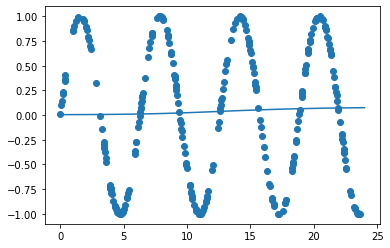

In [65]:
plt.plot(x, yf)
plt.scatter(x1, y)

So now that we've taken a look at a couple of examples with the neural network

How would you go about solving the following problems? Which seem like the kind that a neural network would be suited to?
- Classifying points in the unit circle
- Approximating a quadratic equation
- Approximating a linear equation
- Testing the primality of a natural number

Pick one of the following problems and try and tweak the above code to solve it using a neural network. Try to adapt the code so that your neural nets converge to a solution quicker. What happend when you have more hidden nodes in series or in paralell? Is the result any more accurate? have an experiment and see what you can come up with. Whenever possible work with each other and discuss your results. 